## PROJECT 3: Electric Motor Temperature

> ### TASK: Study Polynomial Linear Regression
> 

### Project goals and objectives

#### Project goal

- Studying **Polynomial Linear Regression**

#### Project objectives

1. Explore and prepare data 
2. Build polynomial linear regression model


### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
plt.style.use('seaborn')


from collections import Counter

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.preprocessing import PolynomialFeatures

### LOAD DATA

In [2]:
# Path to data
data_path = "data/measures_v2.csv"

In [3]:
# Create dataframe
data_df = pd.read_csv(data_path)

# Check result 
data_df.head().T

,0,1,2,3,4
u_q,-0.450682,-0.325737,-0.440864,-0.327026,-0.471150
coolant,18.805172,18.818571,18.828770,18.835567,18.857033
stator_winding,19.086670,19.092390,19.089380,19.083031,19.082525
u_d,-0.350055,-0.305803,-0.372503,-0.316199,-0.332272
stator_tooth,18.293219,18.294807,18.294094,18.292542,18.291428
motor_speed,0.002866,0.000257,0.002355,0.006105,0.003133
i_d,0.004419,0.000606,0.001290,0.000026,-0.064317
i_q,0.000328,-0.000785,0.000386,0.002046,0.037184
pm,24.554214,24.538078,24.544693,24.554018,24.565397
stator_yoke,18.316547,18.314955,18.326307,18.330833,18.326662


## EXPLORATORY DATA ANALISIS

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [5]:
data_df.shape

(1330816, 13)

- **u_q:** Voltage q-component measurement in dq-coordinates (in V)
- **coolant:** Coolant temperature (in °C)
- **stator_winding:** Stator winding temperature (in °C) measured with thermocouples
- **u_d:** Voltage d-component measurement in dq-coordinates
- **stator_tooth:** Stator tooth temperature (in °C) measured with thermocouples
- **motor_speed:** Motor speed (in rpm)
- **i_d:** Current d-component measurement in dq-coordinates
- **i_q:** Current q-component measurement in dq-coordinates
- **pm:** Permanent magnet temperature (in °C) measured with thermocouples and transmitted wirelessly via a thermography unit.
- **stator_yoke:** Stator yoke temperature (in °C) measured with thermocouples
- **ambient:** Ambient temperature (in °C)
- **torque:** Motor torque (in Nm)
- **profile_id:** Measurement session id. Each distinct measurement session can be identified through this integer id.

### Distribution of the target variables

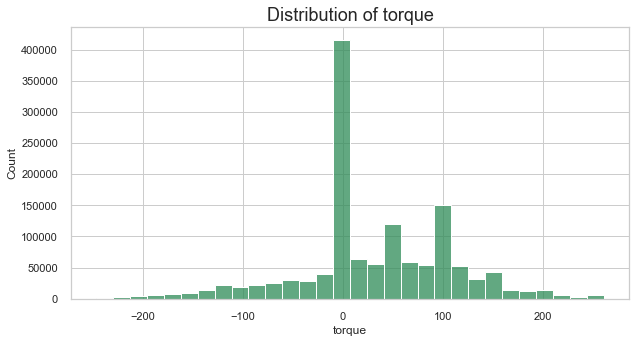

In [6]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=data_df, x="torque", color="seagreen", bins=30)
plt.title("Distribution of torque", fontsize=18);

In [7]:
data_df = data_df.drop(["u_q","stator_winding","i_d","i_q","profile_id"],axis=1)
# Check result 
data_df.head().T

,0,1,2,3,4
coolant,18.805172,18.818571,18.828770,18.835567,18.857033
u_d,-0.350055,-0.305803,-0.372503,-0.316199,-0.332272
stator_tooth,18.293219,18.294807,18.294094,18.292542,18.291428
motor_speed,0.002866,0.000257,0.002355,0.006105,0.003133
pm,24.554214,24.538078,24.544693,24.554018,24.565397
stator_yoke,18.316547,18.314955,18.326307,18.330833,18.326662
ambient,19.850691,19.850672,19.850657,19.850647,19.850639
torque,0.187101,0.245417,0.176615,0.238303,0.208197


### Missing values

In [8]:
 # List of the variables that contain missing values
vars_with_na = [var for var in data_df.columns if data_df[var].isnull().sum() > 0]

# Percentage of missing values
data_df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [9]:
# Descriptive statistics
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
coolant,1330816.0,36.229995,21.786149,10.623751,18.698135,26.900141,49.857487,101.598512
u_d,1330816.0,-25.133809,63.091972,-131.530411,-78.690904,-7.429755,1.470271,131.469788
stator_tooth,1330816.0,56.878582,22.952233,18.133976,38.416012,56.036345,75.586682,111.946423
motor_speed,1330816.0,2202.080728,1859.663350,-275.549144,317.110665,1999.976685,3760.639058,6000.015137
pm,1330816.0,58.506776,19.001498,20.856956,43.151582,60.266287,72.008371,113.606628
stator_yoke,1330816.0,48.187965,19.991004,18.076689,31.990333,45.625509,61.460828,101.147964
ambient,1330816.0,24.565256,1.929522,8.783478,23.184804,24.797327,26.217019,30.714205
torque,1330816.0,31.106032,77.135755,-246.466663,-0.137427,10.860354,91.597176,261.005707


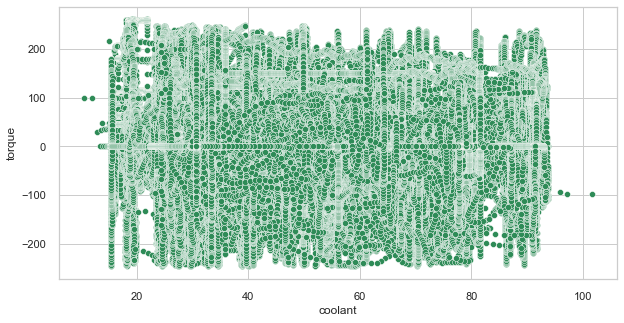

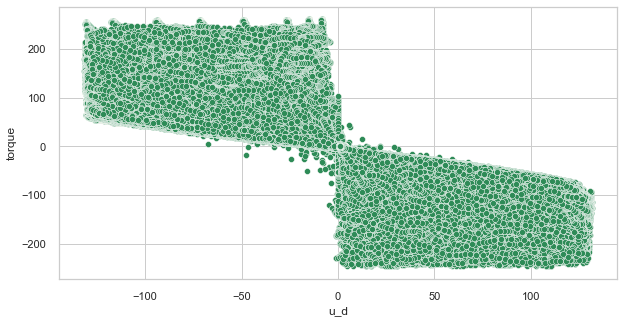

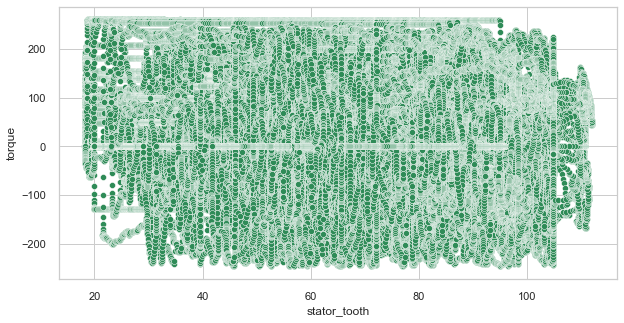

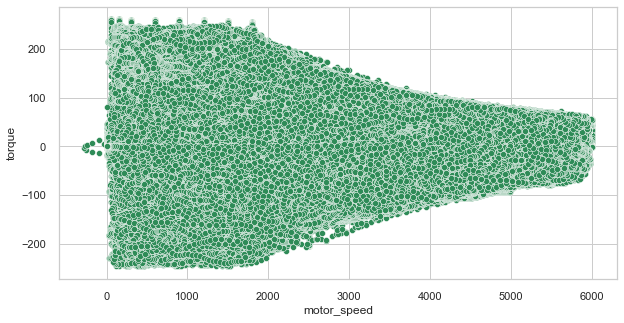

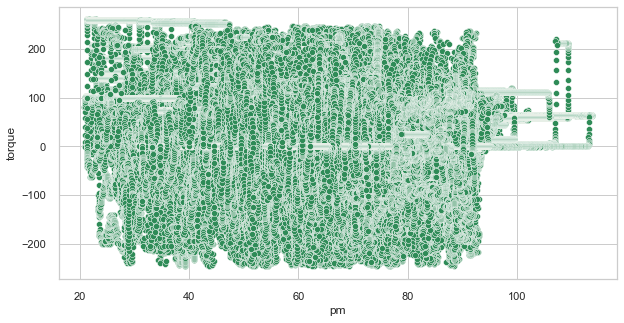

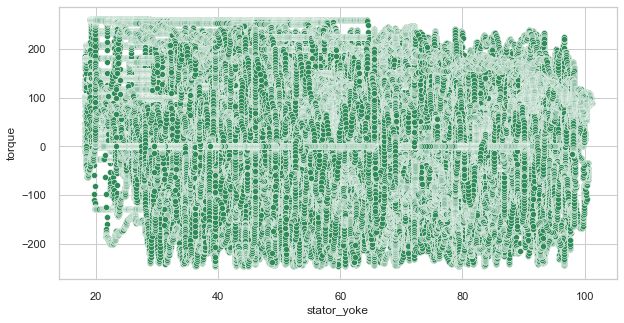

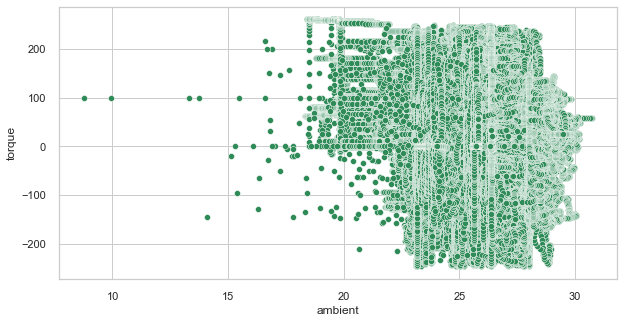

In [10]:
for var in data_df:
    if var !="torque":
        sns.scatterplot(data=data_df, x=var, y="torque", color="seagreen")
        plt.show()

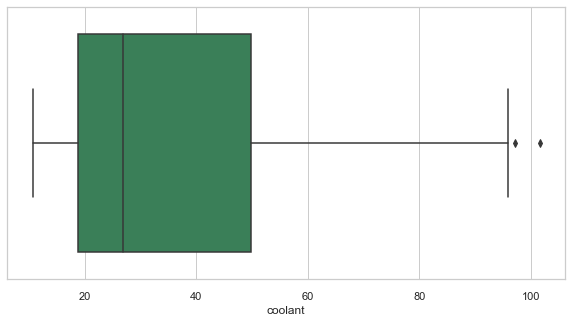

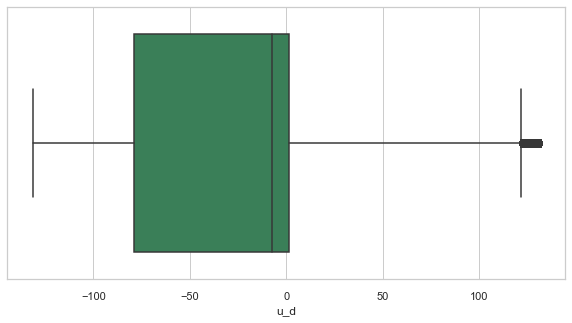

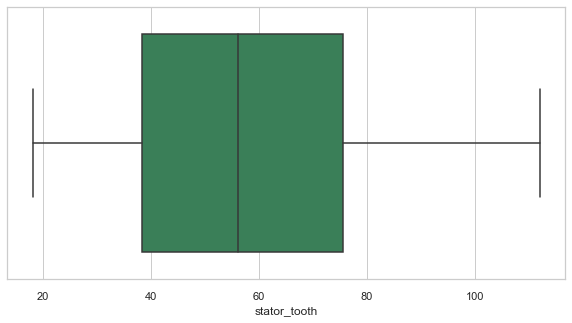

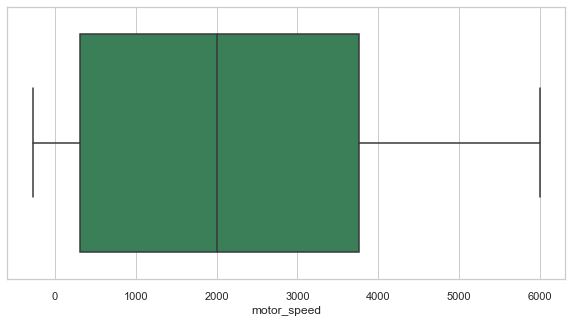

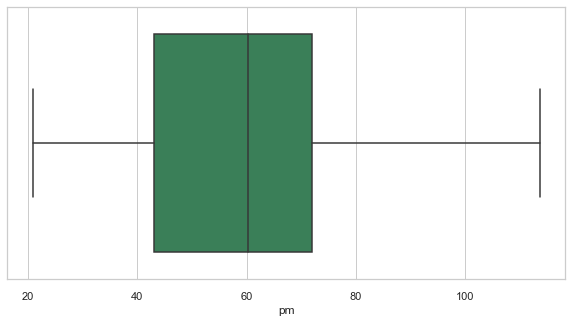

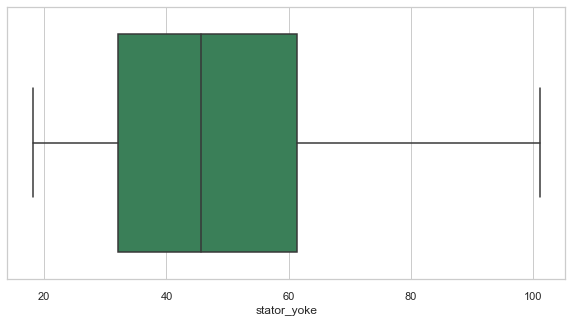

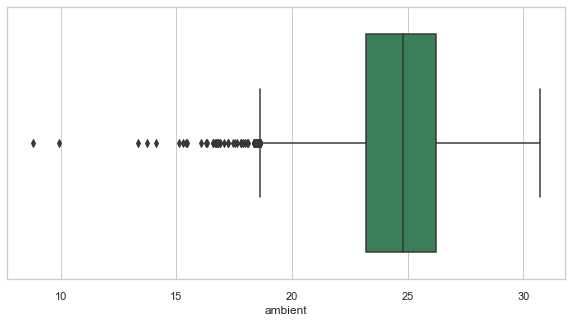

In [11]:
for var in data_df:
    if var !="torque":
        sns.boxplot(data=data_df, x=var,  color="seagreen")
        plt.show()

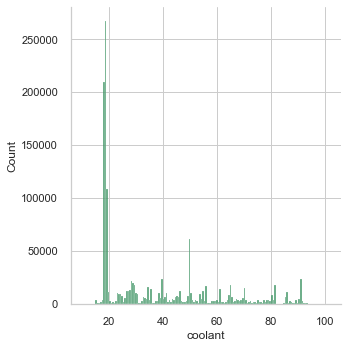

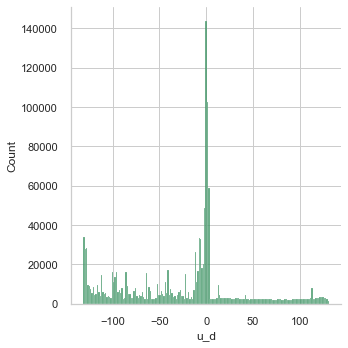

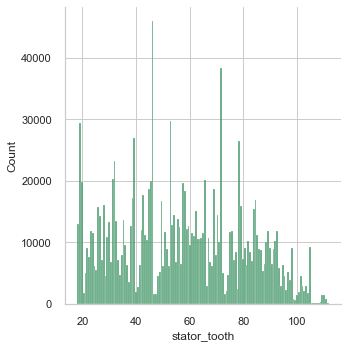

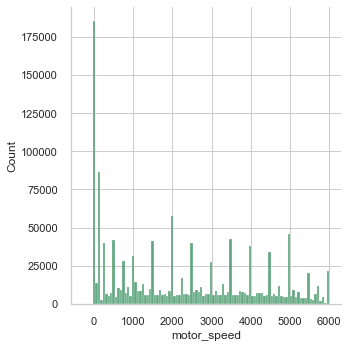

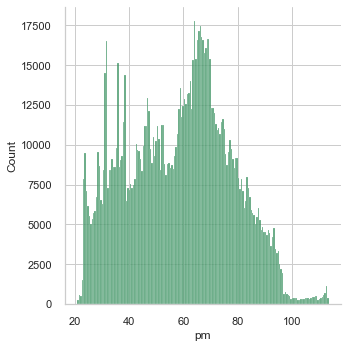

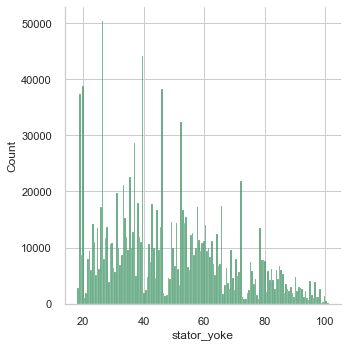

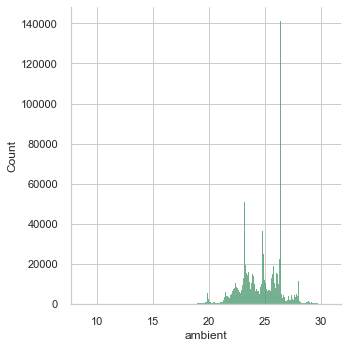

In [12]:
for var in data_df:
    if var !="torque":
        sns.displot(data=data_df, x=var, color="seagreen")
        plt.show()

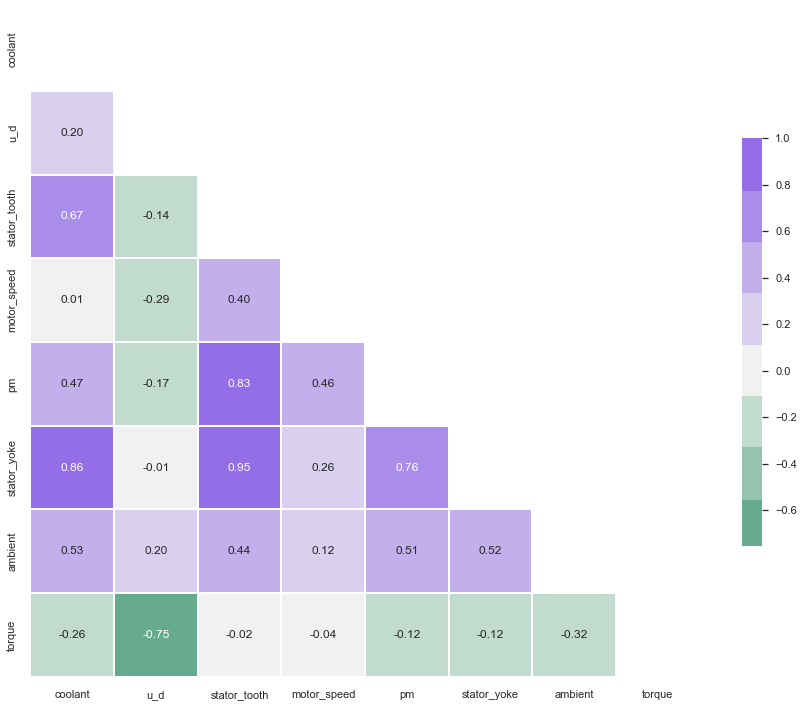

In [13]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar_kws={"shrink": .5})
plt.show()

# POLYNOMINAL LINEAR REGRESSION

In [14]:
# Define x,y
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

In [15]:
print(X)

[[18.80517197 -0.35005459 18.29321861 ... 24.55421448 18.31654739
  19.85069084]
 [18.81857109 -0.305803   18.29480743 ... 24.53807831 18.31495476
  19.85067177]
 [18.82876968 -0.37250262 18.29409409 ... 24.54469299 18.3263073
  19.85065651]
 ...
 [30.72131199  0.80491447 41.80481921 ... 62.13838736 38.65092309
  23.97723426]
 [30.72131615  0.76309074 41.76221951 ... 62.13342152 38.65568634
  24.00142121]
 [30.72131913  0.80730933 41.73476301 ... 62.13142866 38.66037027
  24.02752178]]


In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [17]:
# Standard Normalization
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [18]:
# Instantiate model
poly_reg = PolynomialFeatures(degree = 3)

# Fit the model
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [20]:
# Prediction
y_pred = lin_reg.predict(X_test_poly)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.71e+001  4.75e+001]
 [ 7.53e+001  7.50e+001]
 [-8.57e+001 -7.71e+001]
 ...
 [ 2.63e+001  2.50e+001]
 [-5.89e+000 -3.71e-320]
 [-4.27e+000 -5.86e-001]]


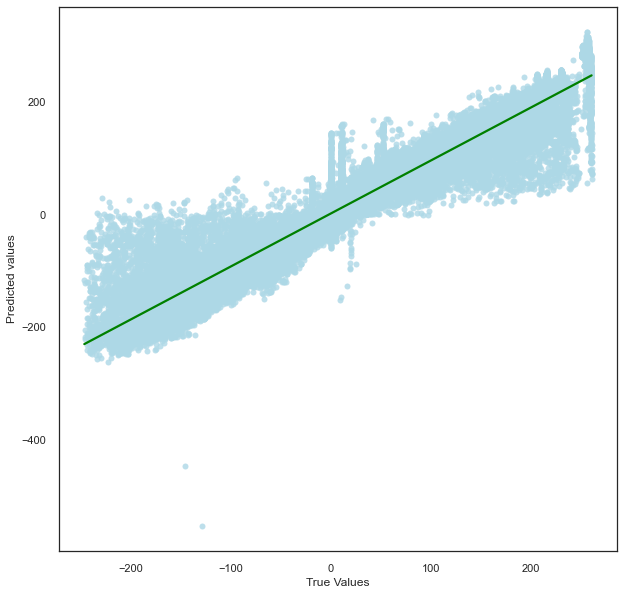

In [21]:
plt.figure(figsize=(10,10))
sns.regplot(x = y_test,y = y_pred,  color="green", scatter_kws={"color": "lightblue"})
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.show()